In [1]:
import os
import random

import gurobipy as gp
import numpy as np
from gurobipy import GRB
import xlrd
import pandas as pd
from datetime import datetime, date
import matplotlib
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
import networkx as nx
from network_setup import *
from data_setup import *
from EnergyCommunityModel import *

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
from CommunityMember import *

# buildings data
buildings_path = "C:\\Users\joche\FIM Kernkompetenzzentrum\Paper Agent-based Modeling - Dokumente\General\\04 ABM\\03_data\\tetraeder_solar\\20220815_0833_kreis_ingolstadt_buildings_export.shp"

roofs_path = "C:\\Users\joche\FIM Kernkompetenzzentrum\Paper Agent-based Modeling - Dokumente\General\\04 ABM\\03_data\\tetraeder_solar\\20220815_0833_kreis_ingolstadt_roofs_export.shp"
# manually curated input
custom_communities_path = 'C:\\Users\joche\FIM Kernkompetenzzentrum\Paper Agent-based Modeling - Dokumente\General\\04 ABM\\03_data\custom_communities'
optimization_parameter_path = 'C:\\Users\joche\FIM Kernkompetenzzentrum\Paper Agent-based Modeling - Dokumente\General\\04 ABM\\03_data\optimization_parameters\\2022 09 30 optimization_parameter.xlsx'
# time series data
residential_load_profile_path = "C:\\Users\joche\FIM Kernkompetenzzentrum\Paper Agent-based Modeling - Dokumente\General\\04 ABM\\03_data\load_profiles\qh_residential_loads_kWh.xlsx"
residential_annual_loads_path = "C:\\Users\joche\FIM Kernkompetenzzentrum\Paper Agent-based Modeling - Dokumente\General\\04 ABM\\03_data\load_profiles\\residential_annual_loads_kWh.xlsx"
residential_ev_load_profile_path = "C:\\Users\joche\FIM Kernkompetenzzentrum\Paper Agent-based Modeling - Dokumente\General\\04 ABM\\03_data\load_profiles\qh_residential_ev_loads_and_location_kWh.xlsx"
electricity_price_path = "C:\\Users\joche\FIM Kernkompetenzzentrum\Paper Agent-based Modeling - Dokumente\General\\04 ABM\\03_data\electricity_price\qh_price_2019_ct_kWh.xlsx"
pv_generation_factors_path = "C:\\Users\joche\FIM Kernkompetenzzentrum\Paper Agent-based Modeling - Dokumente\General\\04 ABM\\03_data\pv_generation\qh_pv_generation_factor.xlsx"

In [2]:
# read in custom energy community with modified agents data
network, gdf = load_network(custom_communities_path, '2022 09 27 11h45m34s')
# set up rest of external data
simulation_data = setup_data(gdf,
                             network,
                             residential_annual_loads_path,
                             residential_load_profile_path,
                             residential_ev_load_profile_path,
                             electricity_price_path,
                             pv_generation_factors_path, optimization_parameter_path)
model = EnergyCommunityModel(simulation_data)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-31


In [3]:
nr_steps = 40
step_times = []

start_time = datetime.now().replace(microsecond=0)
for i in range(nr_steps):
    step_start = datetime.now().replace(microsecond=0)
    model.step()
    step_stop = datetime.now().replace(microsecond=0)
    step_times.append(step_stop - step_start)
    print(f'model step {model.schedule.steps}/{nr_steps} finished. Time: {step_stop-step_start}')
end_time = datetime.now().replace(microsecond=0)
print('-' * 40 + f'\nOverall time elapsed: {end_time - start_time}')

Freeing default Gurobi environment
model step 1/40 finished. Time: 0:00:02
model step 2/40 finished. Time: 0:00:03
model step 3/40 finished. Time: 0:00:04
model step 4/40 finished. Time: 0:00:04
model step 5/40 finished. Time: 0:00:05
model step 6/40 finished. Time: 0:00:05
model step 7/40 finished. Time: 0:00:06
model step 8/40 finished. Time: 0:00:06
model step 9/40 finished. Time: 0:00:07
model step 10/40 finished. Time: 0:00:09
model step 11/40 finished. Time: 0:00:09
model step 12/40 finished. Time: 0:00:09
model step 13/40 finished. Time: 0:00:11
model step 14/40 finished. Time: 0:00:11
model step 15/40 finished. Time: 0:00:12
model step 16/40 finished. Time: 0:00:13
model step 17/40 finished. Time: 0:00:15
model step 18/40 finished. Time: 0:00:16
model step 19/40 finished. Time: 0:00:15
model step 20/40 finished. Time: 0:00:17
model step 21/40 finished. Time: 0:00:19
model step 22/40 finished. Time: 0:00:19
model step 23/40 finished. Time: 0:00:19
model step 24/40 finished. Time

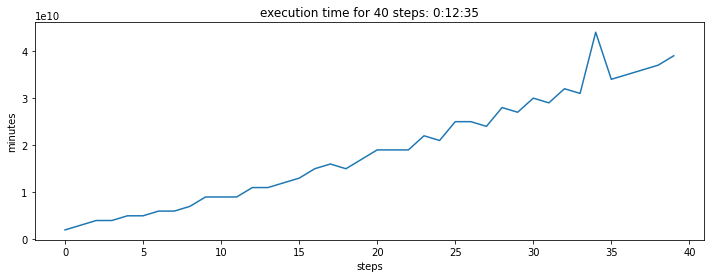

In [7]:
fig, ax = plt.subplots(figsize = (12,4))
pd.Series(step_times, name='step_time').plot(ax = ax, title = f'execution time for {nr_steps} steps: {end_time - start_time}')
ax.set_ylabel('minutes')
ax.set_xlabel('steps')
plt.show()

In [8]:
mdf = model.datacollector.get_model_vars_dataframe()
mdf

,price_g_d,price_g_s,price_n_d,price_n_s,total_grid_demand,total_grid_supply,n_d_volumes,n_s_volumes,n_price_levels,n_price_levels_mean,...,total_baseload_optimal_kW,pv_generation_actual_kW,pv_generation_optimal_kW,total_home battery_soc,total_home_battery_charging,total_home_battery_discharging,avg_load_shifting_ratio,avg_self_sufficiency_ratio,avg_total_costs_consumer,avg_total_costs_prosumer
0,18.058232,6.93,14.756100,6.93,0.000000,0.0,"[32.1734433508639, 29.15196052752514, 29.15196...","[38.63873032937218, 38.63873032937218, 38.6387...",0 1 2 3...,"[14.643980487500002, 14.96028882225, 15.276597...",...,0.296518,0.000000,0.0,37.666462,0.0,0.141954,-0.047463,0.0,0.542044,0.639963
1,17.704482,6.93,17.527437,6.93,0.092535,0.0,"[43.01824783533975, 42.94896382200642, 43.0874...","[1.5798369211974563, 1.5798369211974563, 1.579...",0 1 2 3...,"[14.618756942500001, 14.933606757749999, 15.24...",...,0.341979,0.000000,0.0,37.815887,0.0,0.000000,0.176847,0.0,1.177626,1.342408
2,17.350732,6.93,17.177225,6.93,0.147900,0.0,"[39.200124842881934, 39.200124842881934, 39.28...","[1.5798369211974563, 1.5798369211974563, 1.579...",0 1 2 3...,"[14.592922381875, 14.907165490125001, 15.22140...",...,0.341979,0.000000,0.0,37.815887,0.0,0.000000,0.034691,0.0,1.800509,2.030819
3,16.996982,6.93,16.827012,6.93,0.111135,0.0,"[44.011912420149926, 44.011912420149926, 44.01...","[1.5798369211974563, 1.5798369211974563, 1.579...",0 1 2 3...,"[14.566476805625001, 14.880965019375003, 15.19...",...,0.341979,0.000000,0.0,37.815887,0.0,0.000000,0.155418,0.0,2.410692,2.705194
4,16.643232,6.93,16.476800,6.93,0.111135,0.0,"[45.32217541997891, 45.32217541997891, 45.3124...","[1.5798369211974563, 1.5798369211974563, 1.579...",0 1 2 3...,"[14.53942021375, 14.855005345499999, 15.170590...",...,0.341979,0.000000,0.0,37.815887,0.0,0.000000,0.252182,0.0,3.008176,3.365533
5,16.497482,6.93,16.332507,6.93,0.126664,0.0,"[49.697275258589684, 49.697275258589684, 49.69...","[1.5798369211974563, 1.5798369211974563, 1.579...",0 1 2 ...,"[14.51175260625, 14.829286468500001, 15.146820...",...,0.341979,0.000000,0.0,37.815887,0.0,0.000000,0.003863,0.0,3.600427,4.020090
6,16.351732,6.93,16.188215,6.93,0.042495,0.0,"[47.87042707914557, 47.89737106581224, 47.8606...","[1.5798369211974563, 1.5798369211974563, 1.579...",0 1 2 ...,"[14.48493578, 14.804548825875, 15.12416187175,...",...,0.341979,0.000000,0.0,37.815887,0.0,0.000000,0.129785,0.0,4.187446,4.668863
7,16.205982,6.93,16.043922,6.93,0.121756,0.0,"[47.27739555309, 47.27739555309, 47.2773955530...","[1.5798369211974563, 1.5798369211974563, 1.579...",0 1 2 ...,"[14.458969735000002, 14.780792417625, 15.10261...",...,0.341979,0.000000,0.0,37.815887,0.0,0.000000,0.162033,0.0,4.769233,5.311854
8,16.060232,6.93,15.899630,6.93,0.111135,0.0,"[45.14804549225667, 45.14804549225667, 45.1480...","[1.5798369211974563, 1.5798369211974563, 1.579...",0 1 2 ...,"[14.433854471250001, 14.758017243749999, 15.08...",...,0.341979,0.000000,0.0,37.815887,0.0,0.000000,0.049286,0.0,5.345787,5.949063
9,16.122732,6.93,15.961505,6.93,0.126664,0.0,"[43.925816769659406, 43.925816769659406, 43.92...","[1.5798369211974563, 1.5798369211974563, 1.579...",0 1 2 ...,"[14.409589988750001, 14.736223304249998, 15.06...",...,0.341979,0.000000,0.0,37.815887,0.0,0.000000,0.194964,0.0,5.924585,6.588751


In [9]:
adf = model.datacollector.get_agent_vars_dataframe()
adf

prosumer                                            hh_type  \
Step AgentID                                                                
1    12700       False  One_full-time_and_one_part-time_working_person...   
     12707       False  One_full-time_and_one_part-time_working_person...   
     12713       False     One_full-time_and_one_part-time_working_person   
     12716        True  One_full-time_and_one_part-time_working_person...   
     12717        True      Two_full-time_working_persons,_three_children   
...                ...                                                ...   
40   12717        True      Two_full-time_working_persons,_three_children   
     13230        True  One_full-time_and_one_part-time_working_person...   
     13236        True      Two_full-time_working_persons,_three_children   
     13250       False                      Two_full-time_working_persons   
     13253        True                       One_full-time_working_person   

              pv_percentage  nr_evs  bl_flexibility  price_g_d  price_g_s  \
Step AgentID                                                                
1    12700              0.0       0             0.1  18.058232       6.93   
     12707              0.0       1             0.1  18.058232       6.93   
     12713              0.0       0             0.1  18.058232       6.93   
     12716            100.0       0             0.1  18.058232       6.93   
     12717             50.0       0             0.1  18.058232       6.93   
...                     ...     ...             ...        ...        ...   
40   12717             50.0       0             0.1  16.961732       6.93   
     13230            100.0       0             0.1  16.961732       6.93   
     13236            100.0       0             0.1  16.961732       6.93   
     13250              0.0       1             0.1  16.961732       6.93   
     13253             50.0       1             0.1  16.961732       6.93   

              price_n_d  price_n_s       g_d  ...  pv_kW  pv_surplus  hb_c_kW  \
Step AgentID                                  ...                               
1    12700    14.756100   7.076100  0.000000  ...    0.0         0.0      0.0   
     12707    14.756100   7.076100  0.000000  ...    0.0         0.0      0.0   
     12713    14.756100   7.076100  0.000000  ...    0.0         0.0      0.0   
     12716    14.756100   7.076100  0.000000  ...    0.0         0.0      0.0   
     12717    14.756100   7.076100  0.000000  ...    0.0         0.0      0.0   
...                 ...        ...       ...  ...    ...         ...      ...   
40   12717    16.792115   9.112115  0.000000  ...    0.0         0.0      0.0   
     13230    16.792115   9.112115  0.000000  ...    0.0         0.0      0.0   
     13236    16.792115   9.112115  0.042495  ...    0.0         0.0      0.0   
     13250    16.792115   9.112115  0.000000  ...    0.0         0.0      0.0   
     13253    16.792115   9.112115  0.000000  ...    0.0         0.0      0.0   

               hb_d_kW  hb_soc_kW  ev_c_kW   ev_d_kW  ev_soc_kW  costs_t_ct  \
Step AgentID                                                                  
1    12700    0.000000   0.000000      0.0  0.000000   0.000000    0.540740   
     12707    0.000000   0.000000      0.0  0.033314  27.174255    0.604481   
     12713    0.000000   0.000000      0.0  0.000000   0.000000    0.608416   
     12716    0.029221   7.641820      0.0  0.000000   0.000000    0.529433   
     12717    0.034769   7.872358      0.0  0.000000   0.000000    0.629952   
...                ...        ...      ...       ...        ...         ...   
40   12717    0.000000   7.908957      0.0  0.000000   0.000000    0.720796   
     13230    0.000000   7.592697      0.0  0.000000   0.000000    0.578897   
     13236    0.000000   7.051522      0.0  0.000000   0.000000    0.720796   
     13250    0.000000   0.000000      0.0  0.000000  31.769769    0.473620   
     132

In [20]:
model.schedule.agents[8].nr_evs

1

In [21]:
adf.xs(model.schedule.agents[8].unique_id, level='AgentID')

,prosumer,hh_type,pv_percentage,nr_evs,bl_flexibility,price_g_d,price_g_s,price_n_d,price_n_s,g_d,...,pv_kW,pv_surplus,hb_c_kW,hb_d_kW,hb_soc_kW,ev_c_kW,ev_d_kW,ev_soc_kW,costs_t_ct,costs_total_ct
Step,,,,,,,,,,,,,,,,,,,,,
1,True,One_full-time_working_person,50.0,1,0.1,18.058232,6.93,14.756100,7.076100,0.000000,...,0.0,0.0,0.0,0.050039,7.537459,0.0,0.0,27.124133,0.906625,0.906625
2,True,One_full-time_working_person,50.0,1,0.1,17.704482,6.93,17.527437,9.847437,0.050039,...,0.0,0.0,0.0,0.000000,7.590132,0.0,0.0,27.124133,0.885921,1.792546
3,True,One_full-time_working_person,50.0,1,0.1,17.350732,6.93,17.177225,9.497225,0.050039,...,0.0,0.0,0.0,0.000000,7.590132,0.0,0.0,27.124133,0.868220,2.660766
4,True,One_full-time_working_person,50.0,1,0.1,16.996982,6.93,16.827012,9.147012,0.000000,...,0.0,0.0,0.0,0.000000,7.590132,0.0,0.0,27.124133,0.850518,3.511284
5,True,One_full-time_working_person,50.0,1,0.1,16.643232,6.93,16.476800,8.796800,0.000000,...,0.0,0.0,0.0,0.000000,7.590132,0.0,0.0,27.124133,0.832817,4.344101
6,True,One_full-time_working_person,50.0,1,0.1,16.497482,6.93,16.332507,8.652507,0.050039,...,0.0,0.0,0.0,0.000000,7.590132,0.0,0.0,27.124133,0.825524,5.169624
7,True,One_full-time_working_person,50.0,1,0.1,16.351732,6.93,16.188215,8.508215,0.000000,...,0.0,0.0,0.0,0.000000,7.590132,0.0,0.0,27.124133,0.818230,5.987854
8,True,One_full-time_working_person,50.0,1,0.1,16.205982,6.93,16.043922,8.363922,0.050039,...,0.0,0.0,0.0,0.000000,7.590132,0.0,0.0,27.124133,0.810937,6.798792
9,True,One_full-time_working_person,50.0,1,0.1,16.060232,6.93,15.899630,8.219630,0.000000,...,0.0,0.0,0.0,0.000000,7.590132,0.0,0.0,27.124133,0.803644,7.602435


In [64]:
ts = 40
flex = model.schedule.agents[agent_id].bl_flexibility
print(adf_id['g_d'][ts] - adf_id['g_s'][ts] + adf_id['n_d'][ts] - adf_id['n_s'][ts] + adf_id['pv_kW'][ts] + adf_id['hb_d_kW'][ts] - adf_id['hb_c_kW'][ts] + adf_id['ev_d_kW'][ts] - adf_id['ev_c_kW'][ts])
print(adf_id['D_bl_kW'][ts] * (1-flex))

0.0
0.21510883500000005


In [97]:
constrs = model.schedule.agents[agent_id].m.getConstrs()
len([i for i in constrs if 'flexible_load_ub' in i.ConstrName])

9216

In [77]:
model.schedule.agents[agent_id].m.Params.OutputFlag = 1
model.schedule.agents[agent_id].m.printQuality()

Set parameter OutputFlag to value 1

Solution quality statistics for model agent_12707_hems :
  Maximum violation:
    Bound       : 2.66453526e-15 (g_demand[77])
    Constraint  : 3.55271368e-15 (ev_state_update_i)
    Integrality : 0.00000000e+00


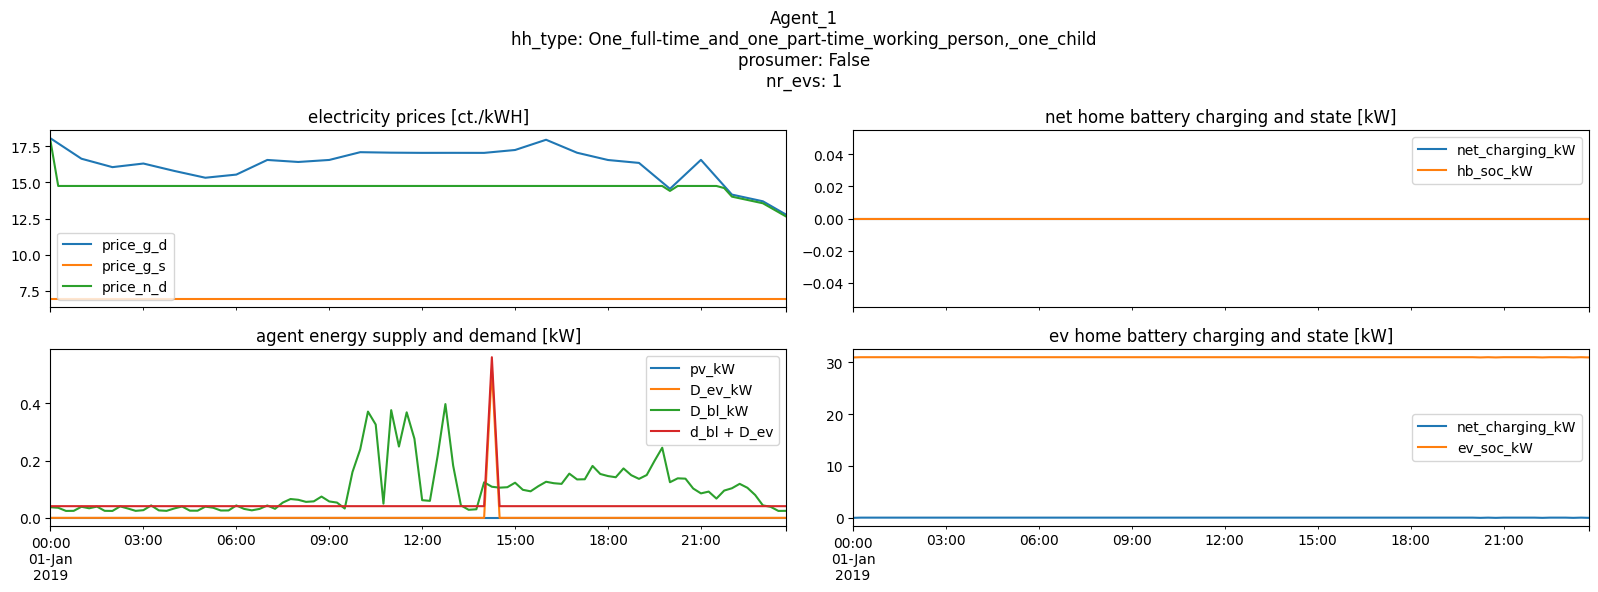

In [53]:
agent_id = 1
adf_id = adf.xs(model.schedule.agents[agent_id].unique_id, level='AgentID')
t_steps = model.database.qh_electricity_price_kWh[model.internal_t:model.internal_t + model.schedule.steps].time.to_numpy()
d_steps = [datetime.strptime(i, '%Y-%m-%d %H:%M') for i in t_steps]
adf_id.index = d_steps

fig, ax = plt.subplots(figsize = (16,6), ncols=2, nrows=2, sharex=True)
plt.suptitle(f'Agent_{agent_id}\nhh_type: {model.schedule.agents[agent_id].residential_type}\nprosumer: {model.schedule.agents[agent_id].prosumer}\nnr_evs: {model.schedule.agents[agent_id].nr_evs}')

adf_id[['price_g_d', 'price_g_s', 'price_n_d']].plot(label = True, ax = ax[0][0], title = 'electricity prices [ct./kWH]')

hb_net_charging = adf_id['hb_c_kW'] - adf_id['hb_d_kW']
hb_net_charging.plot(label = 'net_charging_kW', ax = ax[0][1])
adf_id[['hb_soc_kW']].plot(label = True, ax = ax[0][1], title = 'net home battery charging and state [kW]')
ax[0][1].legend()

adf_id[['pv_kW', 'D_ev_kW', 'D_bl_kW']].plot(label = True, ax = ax[1][0], title = 'agent energy supply and demand [kW]')
D_total = adf_id['d_bl_kW'] + adf_id['D_ev_kW']
D_total.plot(label = 'd_bl + D_ev', ax = ax[1][0])
ax[1][0].legend()

ev_net_charging = adf_id['ev_c_kW'] - adf_id['ev_d_kW']
ev_net_charging.plot(label = 'net_charging_kW', ax = ax[1][1])
adf_id[['ev_soc_kW']].plot(label = True, ax = ax[1][1], title = 'ev home battery charging and state [kW]')
ax[1][1].legend()

plt.tight_layout()
plt.show()

In [ ]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

### Draw network
---

In [ ]:
G = model.database.network
pos = nx.get_node_attributes(G, 'pos')
hids = nx.get_node_attributes(G, 'HID')
nx.draw(G, pos, with_labels=True)